In [1]:
# This is a sample Python script.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [25]:
# Generate a synthetic dataset with easy separability
X, y = make_classification(
    n_samples=10000,      # Total number of samples
    n_features=2,         # Number of features (dimensions)
    n_informative=2,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0,            # Fraction of samples whose class is randomly exchanged
    class_sep=1,         # Separation between the classes
    weights = [0.5, 0.5], # Can adjust balance of the data
    hypercube=True,
    random_state=42
)

print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/tmp/ipykernel_23980/1295941256.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=70, label='Test')


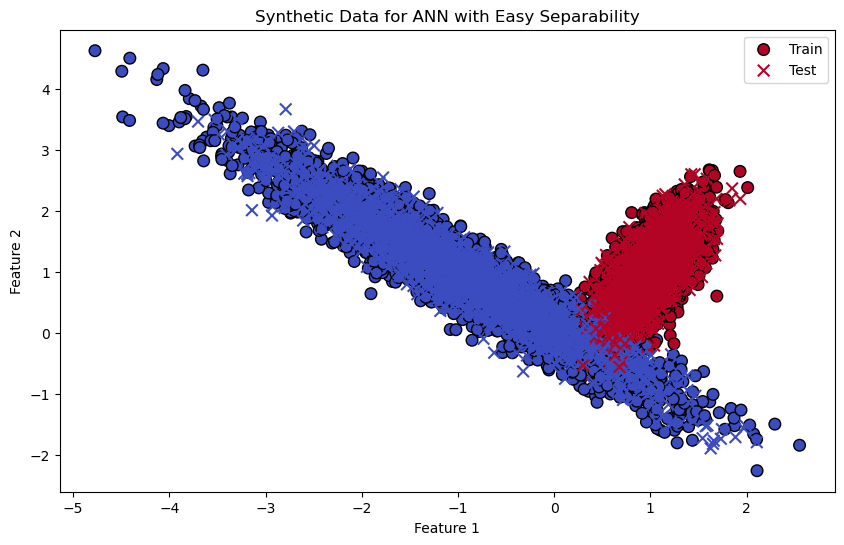

In [27]:
# Plot the generated dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=70, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=70, label='Test')
plt.title("Synthetic Data for ANN with Easy Separability")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [28]:
# clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=200, min_samples_leaf=50)
clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=200, min_samples_leaf=50, max_depth=3)

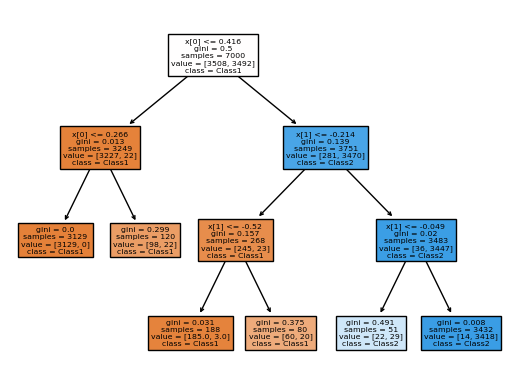

In [29]:
# clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot2 = plt.figure(1)
#tree.plot_tree(clf, feature_names=['Var1', 'Var2'], class_names=['Class1', 'Class2'], filled=True)
tree.plot_tree(clf, class_names=['Class1', 'Class2'], filled=True)
plt.show()


In [30]:
y_pred = clf.predict(X_train)
print("Training performance: ", accuracy_score(y_train, y_pred))
y_pred = clf.predict(X_test)
print("Testing performance: ", accuracy_score(y_test, y_pred))

Training performance:  0.9884285714285714
Testing performance:  0.9876666666666667


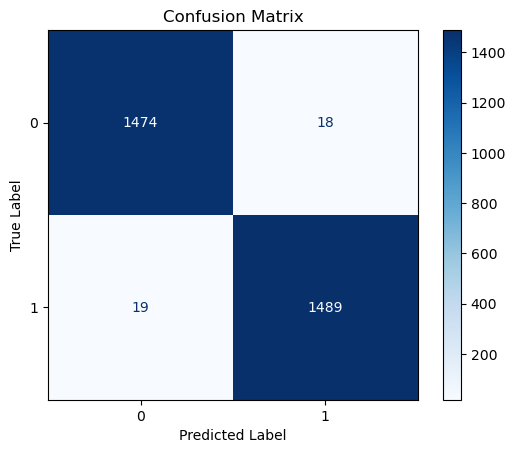

In [31]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()